In [49]:
import numpy as np
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import boston_housing
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
import tensorflow as tf
import pandas as pd

In [50]:
#Dataset

fifa17 = pd.read_csv("datasets/regression/CLEAN_FIFA17_official_data.csv")
fifa18 = pd.read_csv("datasets/regression/CLEAN_FIFA18_official_data.csv")
fifa19 = pd.read_csv("datasets/regression/CLEAN_FIFA19_official_data.csv")
fifa20 = pd.read_csv("datasets/regression/CLEAN_FIFA20_official_data.csv")
fifa21 = pd.read_csv("datasets/regression/CLEAN_FIFA21_official_data.csv")
fifa22 = pd.read_csv("datasets/regression/CLEAN_FIFA22_official_data.csv")

# Adicionar a Coluna "Year" ao dataset
  
fifa17["Year"] = 2017
fifa18["Year"] = 2018
fifa19["Year"] = 2019
fifa20["Year"] = 2020
fifa21["Year"] = 2021
fifa22["Year"] = 2022

df = pd.concat([fifa17,fifa18,fifa19,fifa20,fifa21,fifa22])
df = df.sample(frac=0.6, random_state=42)
# df = fifa17

df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Year_Joined,Year,Release Clause(£),DefensiveAwareness
14848,14848,228250,H. Al Ruwaili,23,https://cdn.sofifa.com/players/228/250/19_60.png,Saudi Arabia,https://cdn.sofifa.com/flags/sa.png,55,62,Al Taawoun,...,11.0,13.0,9.0,14.0,RB,54.0,2018,2019,185000.0,NaN
1525,1525,198118,J. Guilavogui,29,https://cdn.sofifa.com/players/198/118/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,78,78,VfL Wolfsburg,...,8.0,14.0,10.0,15.0,CB,80.0,2016,2021,15300000.0,81.0
13179,13179,234671,J. Odgaard,17,https://cdn.sofifa.com/players/234/671/17_60.png,Denmark,https://cdn.sofifa.com/flags/dk.png,58,78,Lyngby BK,...,13.0,13.0,8.0,11.0,ST,57.0,2015,2017,NaN,NaN
12858,12858,247322,T. Schmitt,21,https://cdn.sofifa.com/players/247/322/19_60.png,United States,https://cdn.sofifa.com/flags/us.png,57,68,Real Salt Lake,...,10.0,5.0,14.0,7.0,ST,57.0,2019,2019,306000.0,NaN
8579,8579,51620,C. Varrault,36,https://cdn.sofifa.com/players/051/620/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,70,70,Dijon FCO,...,11.0,9.0,6.0,7.0,CB,69.0,2011,2017,NaN,NaN


In [51]:
X = df.drop(columns=["Overall"], axis=1)
y = df["Overall"]

In [52]:
#TRATAMENTO DOS DADOS

# Ver a taxa de correlação entre Overall e os outros atributos

corr_overall = df.corr(numeric_only=True)['Overall'].sort_values(ascending=False)
top_20 = corr_overall.nlargest(21).drop(["Overall"])
excluir_features = ["Best Overall Rating","Potential","Value(£)","Wage(£)","Release Clause(£)","International Reputation"]

# Pegar as colunas das features mais correlacionandas ao nosso objetivo

features_ideais = []
for feature in top_20.index:
    if feature not in excluir_features:
        features_ideais.append(feature)

        

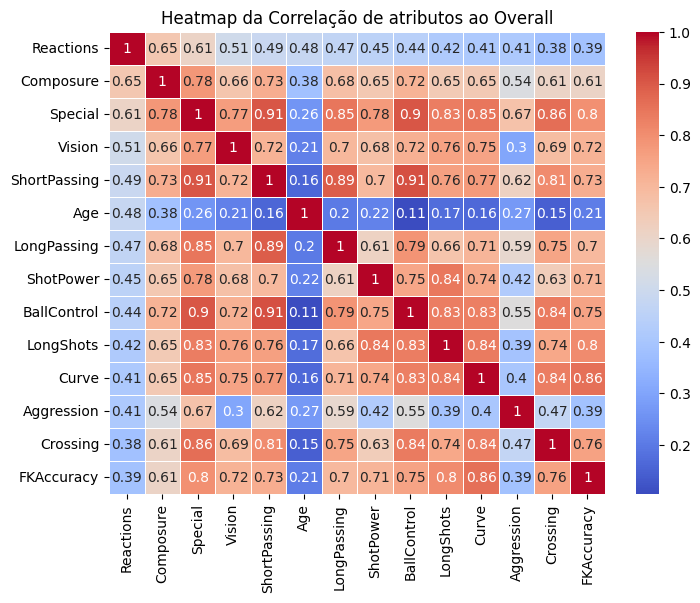

In [53]:
"""
Então fazendos um heatmap para ver se as features estão bem correlacionadas entre sí 
"""
import matplotlib.pyplot as plt
import seaborn as sns


# Colocamos o feature "Overall" devolta na nossas features para podermos fazer o heatmap
selected_attributes_overall=features_ideais
selected_attributes_overall_test = features_ideais+["ID"]
selected_attributes_overall_corr = df[selected_attributes_overall].corr()

# E Por fim plotamos o heatmap para os atributos relacionados com "Overall"
plt.figure(figsize=(8, 6))
sns.heatmap(selected_attributes_overall_corr, annot=True, cmap='coolwarm', linewidth=0.5)
plt.title('Heatmap da Correlação de atributos ao Overall')
plt.show()

In [54]:
X_ima = X[selected_attributes_overall_test]
X = X[selected_attributes_overall]

In [55]:
X

,Reactions,Composure,Special,Vision,ShortPassing,Age,LongPassing,ShotPower,BallControl,LongShots,Curve,Aggression,Crossing,FKAccuracy
14848,50.0,45.0,1371,37.0,46.0,23,30.0,39.0,45.0,20.0,21.0,47.0,46.0,40.0
1525,78.0,75.0,1946,65.0,76.0,29,75.0,78.0,72.0,66.0,42.0,80.0,52.0,53.0
13179,54.0,52.0,1452,50.0,56.0,17,38.0,59.0,58.0,49.0,47.0,39.0,42.0,34.0
12858,47.0,49.0,1489,51.0,53.0,21,36.0,68.0,59.0,54.0,49.0,56.0,50.0,43.0
8579,66.0,61.0,1640,41.0,66.0,36,64.0,65.0,51.0,57.0,68.0,76.0,60.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,60.0,56.0,1522,57.0,53.0,25,45.0,62.0,60.0,52.0,53.0,38.0,55.0,39.0
1905,84.0,75.0,1930,63.0,76.0,28,74.0,73.0,71.0,57.0,47.0,85.0,35.0,71.0
9549,59.0,45.0,1605,51.0,61.0,21,56.0,65.0,57.0,55.0,40.0,61.0,63.0,43.0
16712,54.0,45.0,1090,34.0,28.0,32,20.0,23.0,34.0,20.0,31.0,40.0,7.0,10.0


In [56]:
y

14848    55
1525     78
13179    58
12858    57
8579     70
         ..
11985    61
1905     82
9549     61
16712    61
5081     74
Name: Overall, Length: 62611, dtype: int64

In [57]:
# Load the Boston Housing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_ima, X_test_ima, y_train_ima, y_test_ima = train_test_split(X_ima, y, test_size=0.3, random_state=42)

In [58]:
X_train

,Reactions,Composure,Special,Vision,ShortPassing,Age,LongPassing,ShotPower,BallControl,LongShots,Curve,Aggression,Crossing,FKAccuracy
7620,59.0,57.0,1683,60.0,63.0,17,59.0,56.0,60.0,53.0,65.0,60.0,57.0,61.0
12968,52.0,51.0,1476,52.0,44.0,23,32.0,53.0,62.0,55.0,45.0,70.0,35.0,41.0
17285,53.0,27.0,992,17.0,22.0,21,27.0,22.0,16.0,11.0,18.0,21.0,16.0,12.0
16942,58.0,25.0,875,29.0,23.0,20,15.0,40.0,15.0,9.0,12.0,21.0,13.0,14.0
7494,60.0,58.0,1681,71.0,69.0,19,58.0,65.0,65.0,67.0,59.0,47.0,66.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4876,58.0,56.0,1773,62.0,65.0,29,64.0,64.0,65.0,58.0,59.0,70.0,57.0,58.0
14763,58.0,39.0,1343,44.0,47.0,32,35.0,44.0,37.0,32.0,42.0,55.0,33.0,30.0
10,81.0,83.0,2262,79.0,84.0,26,83.0,85.0,79.0,81.0,77.0,88.0,71.0,64.0
8617,68.0,41.0,1639,62.0,65.0,22,62.0,62.0,66.0,41.0,42.0,63.0,46.0,46.0


In [59]:
X_test

,Reactions,Composure,Special,Vision,ShortPassing,Age,LongPassing,ShotPower,BallControl,LongShots,Curve,Aggression,Crossing,FKAccuracy
13550,54.0,41.0,1425,43.0,50.0,28,29.0,28.0,58.0,24.0,30.0,52.0,54.0,30.0
17090,54.0,26.0,979,34.0,25.0,26,17.0,23.0,14.0,18.0,14.0,21.0,18.0,12.0
149,75.0,62.0,2136,65.0,80.0,33,77.0,83.0,80.0,77.0,80.0,73.0,84.0,68.0
7567,59.0,53.0,1714,58.0,65.0,28,55.0,69.0,62.0,62.0,66.0,59.0,58.0,54.0
10640,50.0,43.0,1582,51.0,62.0,18,59.0,50.0,61.0,42.0,50.0,64.0,42.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,70.0,74.0,1963,67.0,70.0,30,67.0,72.0,71.0,68.0,67.0,67.0,55.0,63.0
4543,68.0,65.0,1782,62.0,70.0,32,67.0,65.0,66.0,68.0,61.0,77.0,65.0,58.0
5142,62.0,64.0,1757,63.0,68.0,21,60.0,59.0,67.0,64.0,56.0,52.0,63.0,45.0
3973,80.0,77.0,1834,80.0,79.0,21,80.0,67.0,82.0,75.0,56.0,41.0,73.0,75.0


In [60]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt

def graph(history:list):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')


    # Plotando o gráfico de acurácia
    plt.subplot(1, 2, 2)
    plt.plot(history.history['mse'])
    plt.title('Mean Absolute Error (mse)')
    plt.xlabel('Epoch')
    plt.ylabel('mse')
   
  

    # Mostrando os gráficos
    plt.show()


In [99]:
from sklearn.utils.class_weight import compute_sample_weight

# Calcular pesos personalizados com base na distribuição dos valores alvo
sample_weights = compute_sample_weight('balanced', y)


## Função de Ativação Linear

In [100]:
from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.layers import Dense, BatchNormalization, Dropout, LayerNormalization, InputLayer
from keras.initializers import glorot_uniform
from sklearn.model_selection import KFold
from keras import regularizers
from keras.callbacks import LearningRateScheduler

kf = KFold(n_splits=3, shuffle=True, random_state=42)
def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation="linear"))

    model.compile(optimizer=Adam(0.001), loss="mean_squared_error", metrics=["mse"])
    return model


history_cross = []
for train_index, test_index in kf.split(X, y ):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sample_weights_train = sample_weights[train_index]

    model = create_model()
    history_cross.append(model.fit(X_train, y_train, epochs=50, sample_weight=sample_weights_train,  batch_size=64, verbose=0))
    loss, accuracy = model.evaluate(X_test, y_test)


653/653 [==============================] - 3s 5ms/step - loss: 15.2130 - mse: 15.2130


In [101]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Squared Error on test set: {mse}')

653/653 [==============================] - 3s 5ms/step - loss: 15.2130 - mse: 15.2130
Mean Squared Error on test set: [15.213031768798828, 15.213031768798828]


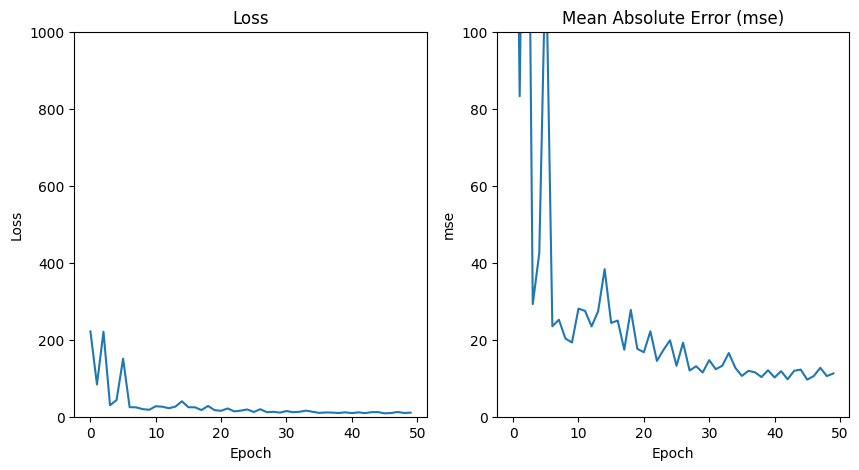

In [102]:
graph(history=history_cross[0])

## Função de Ativação SIGMOID

In [128]:
from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.layers import Dense, BatchNormalization, Dropout, LayerNormalization, InputLayer
from keras.initializers import glorot_uniform
from sklearn.model_selection import KFold
from keras import regularizers
from keras.callbacks import LearningRateScheduler

kf = KFold(n_splits=3, shuffle=True, random_state=42)
def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(optimizer=Adam(0.001), loss="mean_squared_error", metrics=["mse"])
    return model

# Perform cross-validation
history_cross = []
for train_index, test_index in kf.split(X, y ):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sample_weights_train = sample_weights[train_index]

    model = create_model()
    history_cross.append(model.fit(X_train, y_train, epochs=50, sample_weight=sample_weights_train,  batch_size=64, verbose=0))
    loss, accuracy = model.evaluate(X_test, y_test)


653/653 [==============================] - 3s 4ms/step - loss: 4483.4609 - mse: 4483.4609


653/653 [==============================] - 2s 3ms/step - loss: 4483.4609 - mse: 4483.4609
Mean Squared Error on test set: [4483.4609375, 4483.4609375]


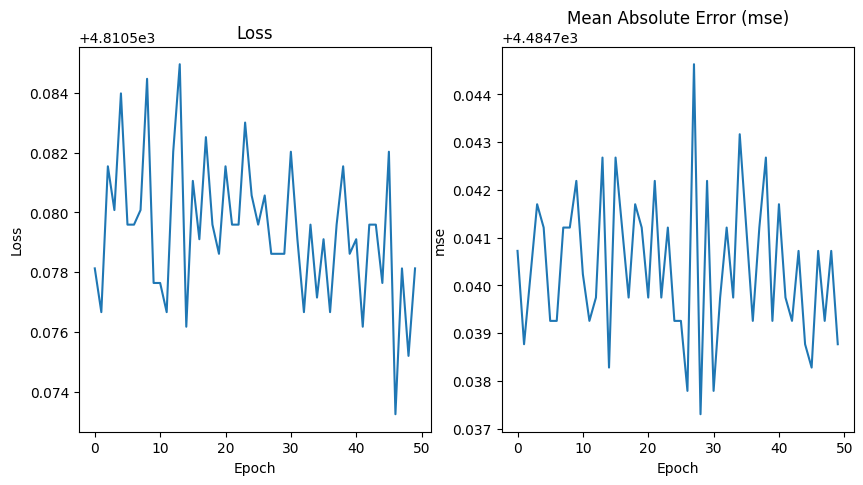

In [131]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Squared Error on test set: {mse}')

graph(history=history_cross[0])

## SOFTMAX

In [132]:
from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.layers import Dense, BatchNormalization, Dropout, LayerNormalization, InputLayer
from keras.initializers import glorot_uniform
from sklearn.model_selection import KFold
from keras import regularizers
from keras.callbacks import LearningRateScheduler

kf = KFold(n_splits=3, shuffle=True, random_state=42)
def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation="softmax"))

    model.compile(optimizer=Adam(0.001), loss="mean_squared_error", metrics=["mse"])
    return model

history_cross = []
for train_index, test_index in kf.split(X, y ):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sample_weights_train = sample_weights[train_index]

    model = create_model()
    history_cross.append(model.fit(X_train, y_train, epochs=50, sample_weight=sample_weights_train,  batch_size=64, verbose=0))
    loss, accuracy = model.evaluate(X_test, y_test)


653/653 [==============================] - 2s 3ms/step - loss: 4351.2651 - mse: 4351.2651


653/653 [==============================] - 2s 3ms/step - loss: 4351.2651 - mse: 4351.2651
Mean Squared Error on test set: [4351.26513671875, 4351.26513671875]


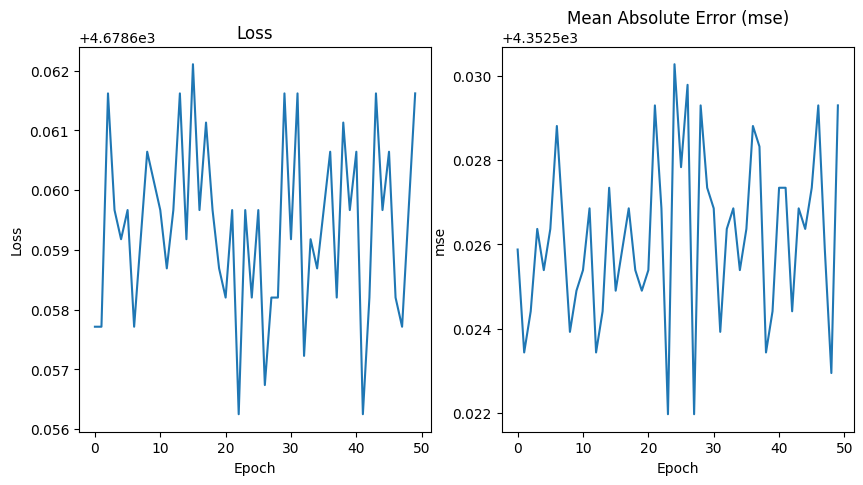

In [133]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Squared Error on test set: {mse}')
graph(history=history_cross[0])

##  FUNÇÃO DE ATIVAÇÃO LEAK_RELU

In [107]:
from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.layers import Dense, BatchNormalization, Dropout, LayerNormalization, InputLayer
from keras.initializers import glorot_uniform
from sklearn.model_selection import KFold
from keras import regularizers
from keras.callbacks import LearningRateScheduler

kf = KFold(n_splits=3, shuffle=True, random_state=42)
def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=X_train.shape[1]))
    model.add(Dense(64, activation='selu'))
    model.add(Dense(32, activation='selu'))
    model.add(Dense(1, activation="leaky_relu"))

    model.compile(optimizer=Adam(0.001), loss="mean_squared_error", metrics=["mse"])
    return model

history_cross = []
for train_index, test_index in kf.split(X, y ):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sample_weights_train = sample_weights[train_index]

    model = create_model()
    history_cross.append(model.fit(X_train, y_train, epochs=50, sample_weight=sample_weights_train,  batch_size=64, verbose=0))
    loss, accuracy = model.evaluate(X_test, y_test)


653/653 [==============================] - 2s 3ms/step - loss: 7.9948 - mse: 7.9948


 13/653 [..............................] - ETA: 2s - loss: 7.2074 - mse: 7.2074 

653/653 [==============================] - 2s 3ms/step - loss: 7.9948 - mse: 7.9948
Mean Squared Error on test set: [7.99475622177124, 7.99475622177124]


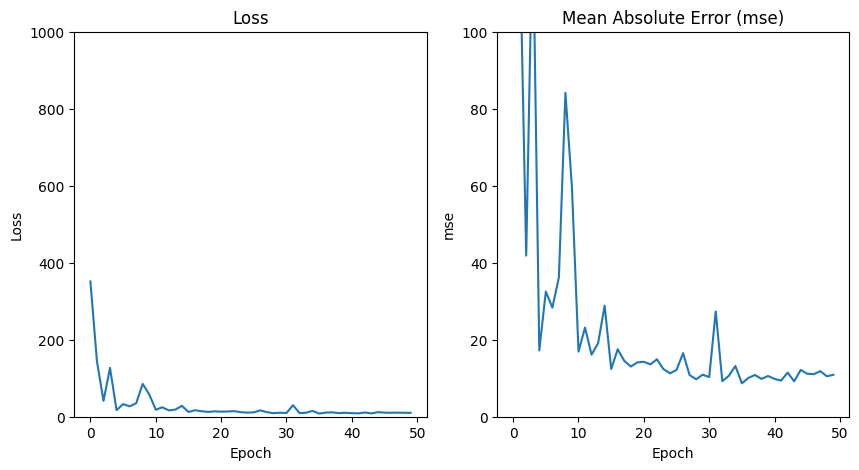

In [108]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Squared Error on test set: {mse}')
graph(history=history_cross[0])

## Modelo com Glorot

In [109]:
from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.layers import Dense, BatchNormalization, Dropout, LayerNormalization, InputLayer
from keras.initializers import glorot_uniform
from sklearn.model_selection import KFold
from keras import regularizers
from keras.callbacks import LearningRateScheduler

kf = KFold(n_splits=3, shuffle=True, random_state=42)

def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=X_train.shape[1]))
    model.add(Dense(64, activation='relu', kernel_initializer=glorot_uniform()))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer=Adam(0.001), loss="mean_squared_error", metrics=["mse"])
    return model

# Perform cross-validation
def power_scheduler(epoch, lr):
    power = 0.5 
    return lr * np.power(1.0 / (1.0 + epoch), power)


history_cross = []
for train_index, test_index in kf.split(X, y ):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sample_weights_train = sample_weights[train_index]

    model = create_model()
    history_cross.append(model.fit(X_train, y_train, epochs=50, sample_weight=sample_weights_train,  batch_size=64, verbose=0))
    loss, accuracy = model.evaluate(X_test, y_test)
    

653/653 [==============================] - 3s 4ms/step - loss: 8.0252 - mse: 8.0252


In [110]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Squared Error on test set: {mse}')

653/653 [==============================] - 3s 4ms/step - loss: 8.0252 - mse: 8.0252
Mean Squared Error on test set: [8.025155067443848, 8.025155067443848]


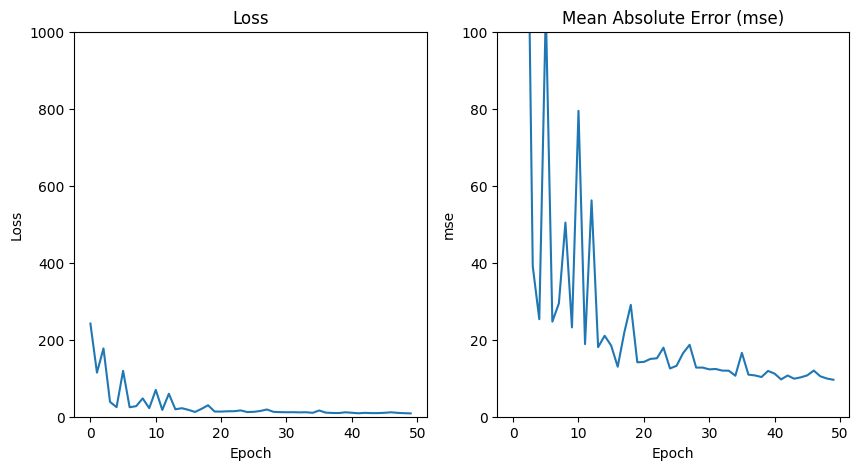

In [111]:
graph(history=history_cross[0])

## COM Bach Normalizer

In [112]:

from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.layers import Dense, BatchNormalization, Dropout, LayerNormalization, InputLayer
from keras.initializers import glorot_uniform
from sklearn.model_selection import KFold
from keras import regularizers
from keras.callbacks import LearningRateScheduler


kf = KFold(n_splits=3, shuffle=True, random_state=42)

def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    # model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    # model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(1, activation="linear"))

    model.compile(optimizer=Adam(0.001), loss="mean_squared_error", metrics=["mse"])
    return model

# Perform cross-validation

def power_scheduler(epoch, lr):
    power = 0.5  # You can adjust the power value
    return lr * np.power(1.0 / (1.0 + epoch), power)

history_cross = []
for train_index, test_index in kf.split(X, y ):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sample_weights_train = sample_weights[train_index]

    model = create_model()
    history_cross.append(model.fit(X_train, y_train, epochs=50, sample_weight=sample_weights_train,  batch_size=64, verbose=0))
    loss, accuracy = model.evaluate(X_test, y_test)

653/653 [==============================] - 3s 4ms/step - loss: 8.4754 - mse: 8.4754


In [113]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Squared Error on test set: {mse}')

653/653 [==============================] - 3s 4ms/step - loss: 8.4754 - mse: 8.4754
Mean Squared Error on test set: [8.475381851196289, 8.475381851196289]


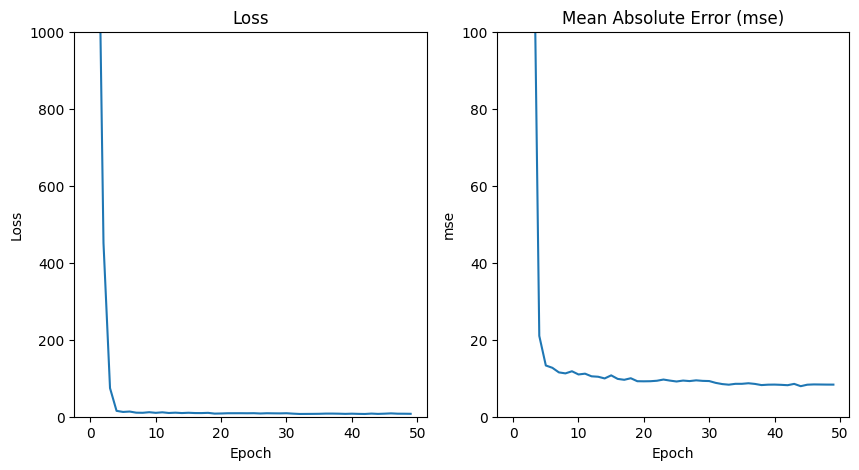

In [114]:
graph(history=history_cross[0])

## COM DROPOUT

In [115]:

from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.layers import Dense, BatchNormalization, Dropout, LayerNormalization, InputLayer
from keras.initializers import glorot_uniform
from sklearn.model_selection import KFold
from keras import regularizers

kf = KFold(n_splits=3, shuffle=True, random_state=42)

def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation="linear"))

    model.compile(optimizer=Adam(0.001), loss="mean_squared_error", metrics=["mse"])
    return model


history_cross = []
for train_index, test_index in kf.split(X, y ):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sample_weights_train = sample_weights[train_index]

    model = create_model()
    history_cross.append(model.fit(X_train, y_train, epochs=50, sample_weight=sample_weights_train,  batch_size=64, verbose=0))
    loss, accuracy = model.evaluate(X_test, y_test)

653/653 [==============================] - 2s 3ms/step - loss: 137.5665 - mse: 137.5665


In [116]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Squared Error on test set: {mse}')

653/653 [==============================] - 2s 4ms/step - loss: 137.5665 - mse: 137.5665
Mean Squared Error on test set: [137.5664520263672, 137.5664520263672]


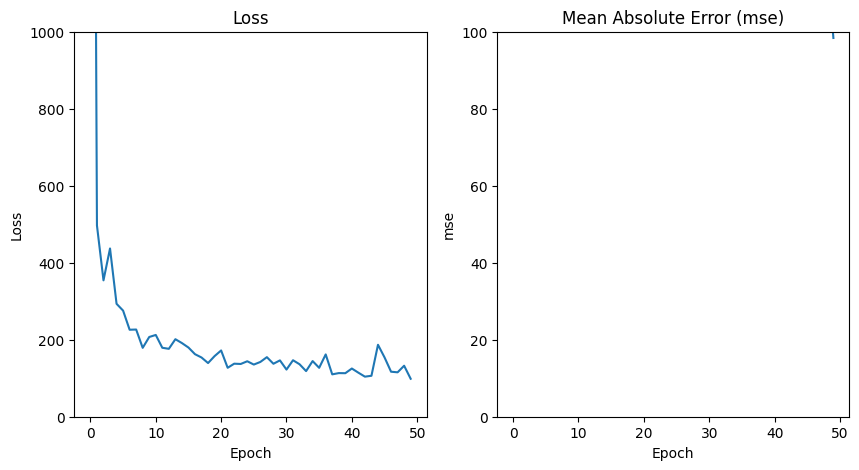

In [117]:
graph(history=history_cross[0])

## COM L2

In [118]:
from keras.optimizers import Adam, SGD
from keras.regularizers import l2
from keras.layers import Dense, BatchNormalization, Dropout, LayerNormalization, InputLayer
from keras.initializers import glorot_uniform
from sklearn.model_selection import KFold
from keras import regularizers

kf = KFold(n_splits=3, shuffle=True, random_state=42)

def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=X_train.shape[1]))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
    model.add(Dense(1, activation="linear", kernel_regularizer=regularizers.l2(0.01)))

    model.compile(optimizer=Adam(0.001), loss="mean_squared_error", metrics=["mse"])
    return model


history_cross = []
for train_index, test_index in kf.split(X, y ):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sample_weights_train = sample_weights[train_index]

    model = create_model()
    history_cross.append(model.fit(X_train, y_train, epochs=50, sample_weight=sample_weights_train,  batch_size=64, verbose=0))
    loss, accuracy = model.evaluate(X_test, y_test)
    

653/653 [==============================] - 2s 3ms/step - loss: 9.7076 - mse: 9.5594


In [119]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Squared Error on test set: {mse}')

653/653 [==============================] - 2s 3ms/step - loss: 9.7076 - mse: 9.5594
Mean Squared Error on test set: [9.707581520080566, 9.55943775177002]


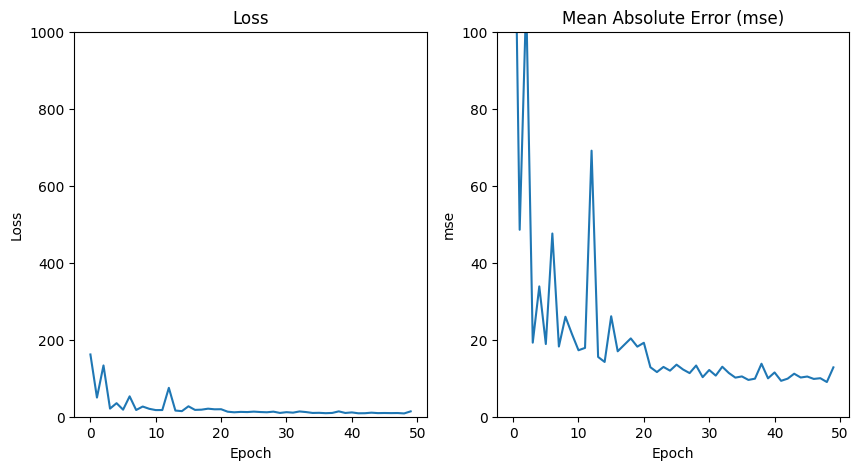

In [120]:
graph(history=history_cross[0])

## Power Scheduling

In [121]:

from keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras.regularizers import l2
from keras.layers import Dense, BatchNormalization, Dropout, LayerNormalization, InputLayer
from keras.initializers import glorot_uniform
from sklearn.model_selection import KFold, learning_curve
from keras import regularizers

kf = KFold(n_splits=3, shuffle=True, random_state=42)

def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation="linear"))
    model.compile(optimizer=Adam(0.001), loss="mean_squared_error", metrics=["mse"])
    return model


def exponential_scheduler(epoch, initial_lr, k):
    return initial_lr * np.exp(-k * epoch)
# Define the power schedule function

def power_scheduler(epoch, initial_lr, max_epochs, power):
    return initial_lr * ((1 - epoch / max_epochs) ** power)

initial_lr = 0.01
k = 0.1
power = 2

# Create a learning rate scheduler callback
lr_schedule = LearningRateScheduler(lambda epoch: power_scheduler(epoch, initial_lr, 50, power))

# Perform cross-validation
history_cross = []
for train_index, test_index in kf.split(X, y ):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sample_weights_train = sample_weights[train_index]

    model = create_model()
    history_cross.append(model.fit(X_train, y_train, epochs=50, sample_weight=sample_weights_train, callbacks=[lr_schedule],  batch_size=64, verbose=0))
    loss, accuracy = model.evaluate(X_test, y_test)

653/653 [==============================] - 3s 4ms/step - loss: 8.8327 - mse: 8.8327


In [122]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Squared Error on test set: {mse}')

653/653 [==============================] - 3s 5ms/step - loss: 8.8327 - mse: 8.8327
Mean Squared Error on test set: [8.832710266113281, 8.832710266113281]


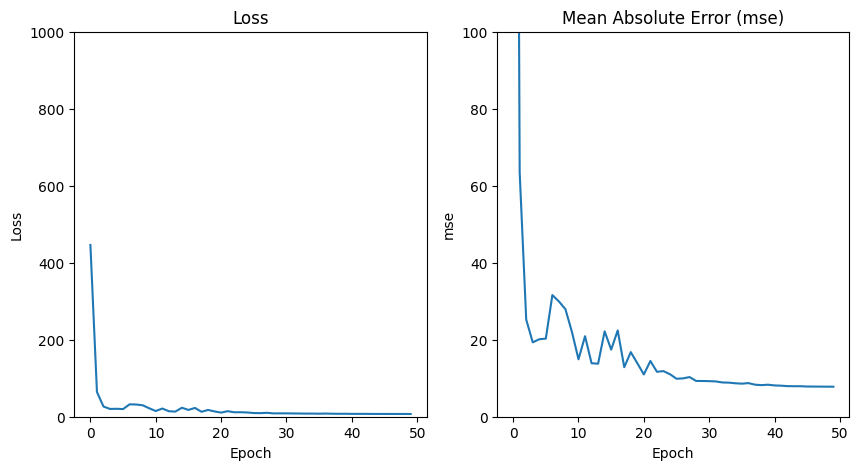

In [123]:
graph(history=history_cross[0])

## Exponencial Scheduling

In [124]:

from keras.optimizers import Adam, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras.regularizers import l2
from keras.layers import Dense, BatchNormalization, Dropout, LayerNormalization, InputLayer
from keras.initializers import glorot_uniform
from sklearn.model_selection import KFold, learning_curve
from keras import regularizers

kf = KFold(n_splits=3, shuffle=True, random_state=42)

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.1,
    decay_rate=0.96,
    decay_steps=50,  # decay the learning rate every epoch
    staircase=True  # True: use integer division, False: use float division
)

def create_model():
    model = Sequential()
    model.add(InputLayer(input_shape=X_train.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation="linear"))

    model.compile(optimizer=Adam(0.001), loss="mean_squared_error", metrics=["mse"])
    return model

lr_scheduler = LearningRateScheduler(lr_schedule)


# Perform cross-validation
history_cross = []
for train_index, test_index in kf.split(X, y ):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    sample_weights_train = sample_weights[train_index]

    model = create_model()
    history_cross.append(model.fit(X_train, y_train, epochs=50, sample_weight=sample_weights_train, callbacks=[lr_scheduler],  batch_size=64, verbose=0))
    loss, accuracy = model.evaluate(X_test, y_test)

653/653 [==============================] - 3s 4ms/step - loss: 56.3646 - mse: 56.3646


In [125]:
# Evaluate the model on the test set
mse = model.evaluate(X_test, y_test, verbose=1)
print(f'Mean Squared Error on test set: {mse}')

  1/653 [..............................] - ETA: 58s - loss: 85.7548 - mse: 85.7548

653/653 [==============================] - 4s 5ms/step - loss: 56.3646 - mse: 56.3646
Mean Squared Error on test set: [56.36463928222656, 56.36463928222656]


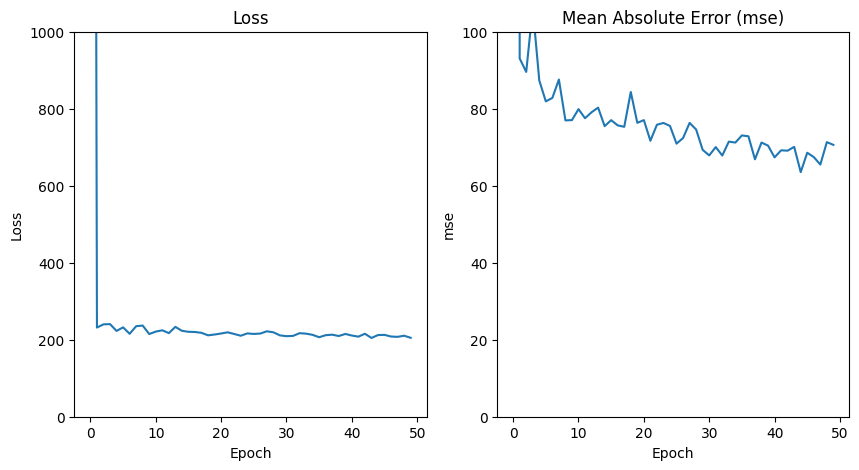

In [126]:
graph(history=history_cross[0])